In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
import matplotlib
import timeit
import feather
import statsmodels as stm
import autotime
%matplotlib inline
%load_ext autotime
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression as LinR
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
res = pd.read_csv('Route_XXXX_travel_time_csvs/Route_084X_travel_time.csv')
route_list_09090786 = ['007D', '007B', '0011', '032X', '0116', '0145', '046E', '041X', '0118', '046A']
for r in route_list_09090786:
    df = pd.read_csv('Route_XXXX_travel_time_csvs/Route_%s_travel_time.csv' % r)
    res = pd.concat([df, res], axis=0) 
res

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed
0,Monday,2019,0,046A0001,0.000000,20172019,False,2017,2012-11-05,21,7429,9.0
1,Monday,2020,0,046A0001,0.000000,20192020,False,2019,2012-11-05,20,7429,9.0
2,Monday,2021,0,046A0001,0.000000,20202021,False,2020,2012-11-05,18,7429,9.0
3,Monday,2022,0,046A0001,0.000000,20212022,False,2021,2012-11-05,43,7429,9.0
4,Monday,4565,0,046A0001,0.000000,20224565,False,2022,2012-11-05,59,7429,9.0
5,Monday,4566,0,046A0001,0.000000,45654566,False,4565,2012-11-05,22,7429,9.0
6,Monday,4567,0,046A0001,0.000000,45664567,False,4566,2012-11-05,59,7429,9.0
7,Monday,2031,0,046A0001,0.000000,45672031,False,4567,2012-11-05,38,7429,9.0
8,Monday,2032,0,046A0001,0.000000,20312032,False,2031,2012-11-05,61,7429,9.0
9,Monday,2034,0,046A0001,0.000000,20322034,False,2032,2012-11-05,38,7429,9.0


time: 2.65 s


Description:  This segment is on Leeson Street, going into the city centre, just before the turn off to drive around Stephens Green.

In [3]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in res:
    print(column + "\t" + str(len(res[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	648
HourFrame	19
JourneyPatternID	50
Rain	107
SSID	4326
SchoolHoliday	2
SourceStopID	647
TimeFrame	57
TravelTime	2266
VehicleJourneyID	3723
WindSpeed	58
time: 244 ms


In [4]:
# create dataframe for SSID 09090786

res['SSID'] = res['SSID'].astype('category')
leeson = res[res.SSID == 9090786]
leeson.shape

(12986, 12)

time: 161 ms


In [5]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in leeson:
    print(column + "\t" + str(len(leeson[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	1
HourFrame	19
JourneyPatternID	25
Rain	91
SSID	1
SchoolHoliday	2
SourceStopID	1
TimeFrame	56
TravelTime	183
VehicleJourneyID	2171
WindSpeed	58
time: 10 ms


In [6]:
# drop unneeded columns

leeson = leeson.drop(['SourceStopID', 'DestStopID'], axis=1)

time: 2 ms


In [7]:
# reorder columns

leeson = leeson[['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'TimeFrame', 'JourneyPatternID', 'VehicleJourneyID', 'SSID']]

time: 2 ms


In [8]:
leeson

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
311530,39,6,Tuesday,False,0.000000,12.0,2012-11-06,046A1001,7220,9090786
311591,59,9,Tuesday,False,0.000000,15.5,2012-11-06,046A1001,7222,9090786
311651,82,12,Tuesday,False,0.000000,17.5,2012-11-06,046A1001,7224,9090786
311711,59,15,Tuesday,False,0.000000,16.5,2012-11-06,046A1001,7226,9090786
311824,18,20,Tuesday,False,0.000000,15.0,2012-11-06,046A1001,7230,9090786
311881,41,6,Tuesday,False,0.000000,12.0,2012-11-06,046A1001,7231,9090786
311940,59,9,Tuesday,False,0.000000,15.5,2012-11-06,046A1001,7233,9090786
312001,78,12,Tuesday,False,0.000000,17.5,2012-11-06,046A1001,7235,9090786
312062,59,15,Tuesday,False,0.000000,16.5,2012-11-06,046A1001,7237,9090786
312115,61,18,Tuesday,False,0.000000,14.0,2012-11-06,046A1001,7239,9090786


time: 36 ms


In [9]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 
leeson.SSID = leeson.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 30 ms


In [10]:
leeson.reset_index(inplace=True)
leeson = leeson.drop('index', axis=1)
leeson

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
0,39,6,Tuesday,False,0.000000,12.0,2012-11-06,046A1001,7220,09090786
1,59,9,Tuesday,False,0.000000,15.5,2012-11-06,046A1001,7222,09090786
2,82,12,Tuesday,False,0.000000,17.5,2012-11-06,046A1001,7224,09090786
3,59,15,Tuesday,False,0.000000,16.5,2012-11-06,046A1001,7226,09090786
4,18,20,Tuesday,False,0.000000,15.0,2012-11-06,046A1001,7230,09090786
5,41,6,Tuesday,False,0.000000,12.0,2012-11-06,046A1001,7231,09090786
6,59,9,Tuesday,False,0.000000,15.5,2012-11-06,046A1001,7233,09090786
7,78,12,Tuesday,False,0.000000,17.5,2012-11-06,046A1001,7235,09090786
8,59,15,Tuesday,False,0.000000,16.5,2012-11-06,046A1001,7237,09090786
9,61,18,Tuesday,False,0.000000,14.0,2012-11-06,046A1001,7239,09090786


time: 35 ms


In [12]:
# save as csv

r = leeson.loc[0, 'SSID'] 
leeson.to_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 286 ms


In [13]:
# load csv

leeson = pd.read_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 17 ms


In [14]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 

leeson.SSID = leeson.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 11 ms


In [15]:
leeson.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 11 columns):
Unnamed: 0          12986 non-null int64
TravelTime          12986 non-null int64
HourFrame           12986 non-null int64
Day                 12986 non-null object
SchoolHoliday       12986 non-null bool
Rain                12986 non-null float64
WindSpeed           12986 non-null float64
TimeFrame           12986 non-null object
JourneyPatternID    12986 non-null object
VehicleJourneyID    12986 non-null int64
SSID                12986 non-null object
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 3.8 MB
time: 12 ms


In [16]:
leeson = leeson.drop('Unnamed: 0', axis=1)

time: 2 ms


In [17]:
# assign more appropriate datatypes
leeson['Day'] = leeson['Day'].astype('category')
leeson['JourneyPatternID'] = leeson['JourneyPatternID'].astype('category')
leeson['VehicleJourneyID'] = leeson['VehicleJourneyID'].astype('category')
leeson['SSID'] = leeson['SSID'].astype('category')
leeson['HourFrame'] = leeson['HourFrame'].astype('category')
leeson['TimeFrame'] = pd.to_datetime(leeson['TimeFrame'], format='%Y-%m-%d')

time: 16 ms


In [18]:
# necessary for later operation

leeson.JourneyPatternID.cat.remove_unused_categories(inplace=True)

time: 2 ms


In [19]:
leeson.memory_usage(deep=True)

Index                   80
TravelTime          103888
HourFrame            13778
Day                  13755
SchoolHoliday        12986
Rain                103888
WindSpeed           103888
TimeFrame           103888
JourneyPatternID     14597
VehicleJourneyID    125260
SSID                 13131
dtype: int64

time: 7 ms


## Analysis of target feature TravelTime

Histiogram of values (x-axis is number of seconds)

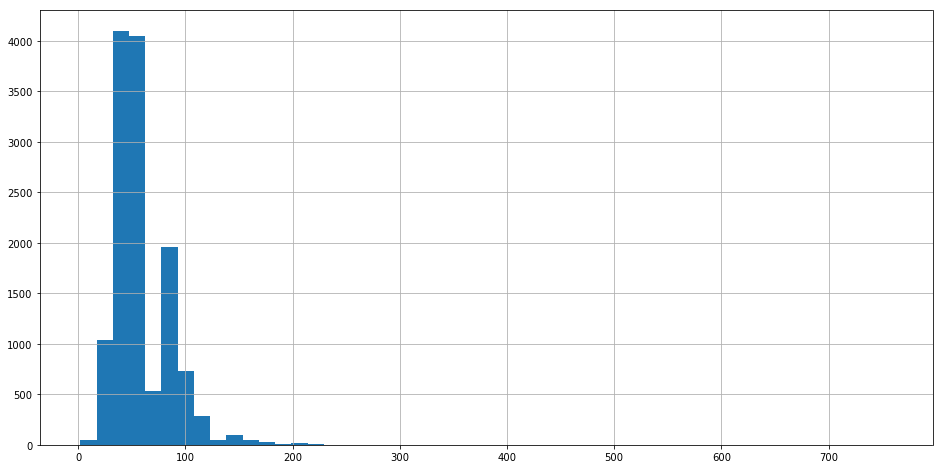

time: 232 ms


In [20]:
leeson.TravelTime.hist(figsize=(16, 8), bins=50)

Boxplot to check for outliers

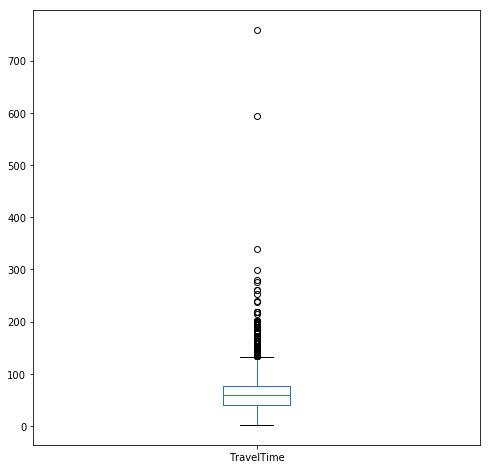

time: 190 ms


In [21]:
leeson.TravelTime.plot(kind='box', figsize=(8, 8), showfliers=True)

In [22]:
# checking how isolated top high-value outliers are in terms of time/date, and density of low-value outliers 

leeson.sort_values(['TravelTime', 'TimeFrame'], ascending=False, inplace=True)
leeson

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
8980,759,17,Friday,False,0.666504,18.0,2013-01-18,1451001,6378,09090786
7057,593,13,Wednesday,False,0.000000,11.5,2012-11-21,1451001,6036,09090786
12087,340,7,Tuesday,False,0.000000,3.5,2013-01-22,111001,4506,09090786
7585,299,20,Wednesday,False,0.000000,6.5,2012-11-28,1451001,6160,09090786
6577,280,18,Wednesday,False,0.000000,6.0,2012-11-14,1451001,6792,09090786
11339,275,19,Thursday,False,0.000000,4.0,2012-11-29,111001,4664,09090786
840,260,18,Wednesday,False,0.000000,6.0,2012-11-14,046A1001,7263,09090786
10769,260,18,Wednesday,False,0.000000,6.0,2012-11-14,111001,5250,09090786
2513,252,19,Friday,False,0.000000,2.5,2012-11-30,046A1001,6432,09090786
8978,239,16,Friday,False,1.533203,18.5,2013-01-18,1451001,6363,09090786


time: 40 ms


In [23]:
leeson.columns

Index(['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed',
       'TimeFrame', 'JourneyPatternID', 'VehicleJourneyID', 'SSID'],
      dtype='object')

time: 3 ms


Observation:  Note from the table above that there seem to be several rows with improbably low values for TravelTime, more than there are unrealistically high ones.

## Weather features

(array([ 0.5,  1.5,  2.5]), <a list of 3 Text xticklabel objects>)

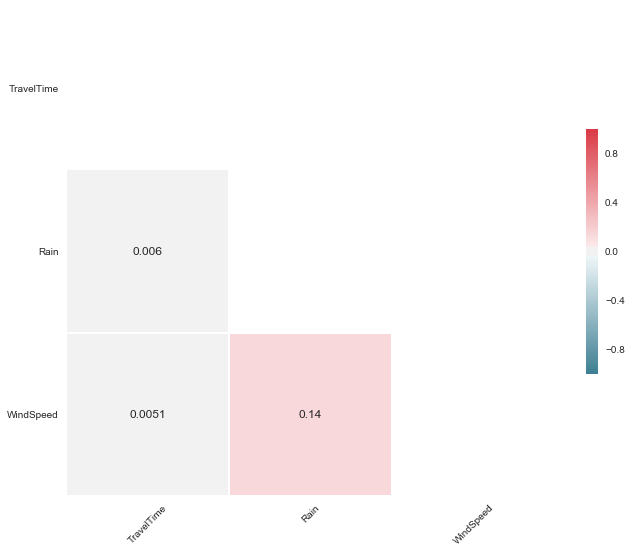

time: 221 ms


In [24]:
# checking correlations between weather and TravelTime

cont_columns = leeson[['TravelTime', 'Rain', 'WindSpeed']].columns

# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = df[cont_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

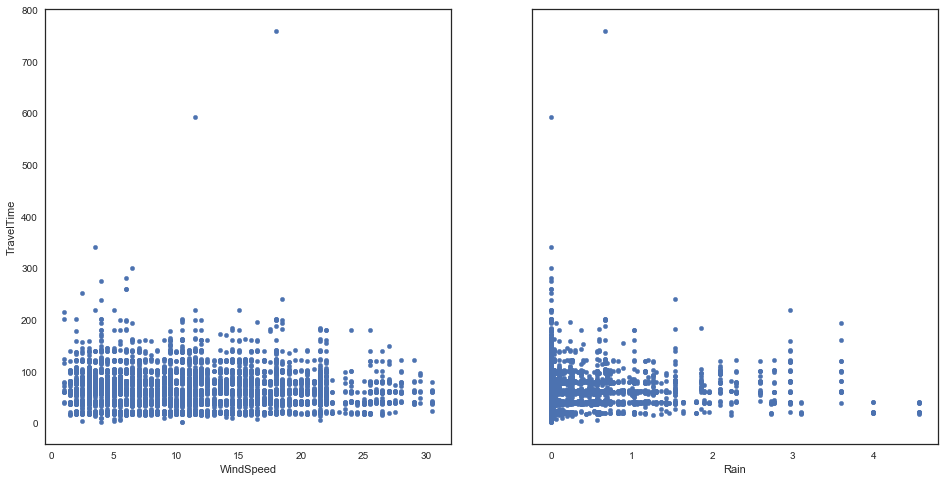

time: 550 ms


In [25]:
# scatterplots for the relationship between weather and TravelTime
fig, axs = plt.subplots(1, 2, sharey=True)
leeson.plot(kind='scatter', x='WindSpeed', y='TravelTime', ax=axs[0], figsize=(16, 8))
leeson.plot(kind='scatter', x='Rain', y='TravelTime', ax=axs[1])

Observation:  No apparent correllation between weather and TravelTime here.

## TravelTime and categorical features

In [26]:
# Checking stats for TravelTime so as to better understand the following graphs
# Create values for horizontal lines in the charts below to represent the mean/medium.

leeson_mean = leeson.TravelTime.mean()
leeson_median  = leeson.TravelTime.median()
leeson.TravelTime.describe()

count    12986.000000
mean        59.226706
std         27.661573
min          2.000000
25%         40.000000
50%         59.000000
75%         77.000000
max        759.000000
Name: TravelTime, dtype: float64

time: 7 ms


Observation:  So the median and average are both around 59 seconds for this segment.  There are implausible extremes at both ends.

## JourneyPatternID strip plot

#### Note: In below charts, horizontal line is overall mean/median

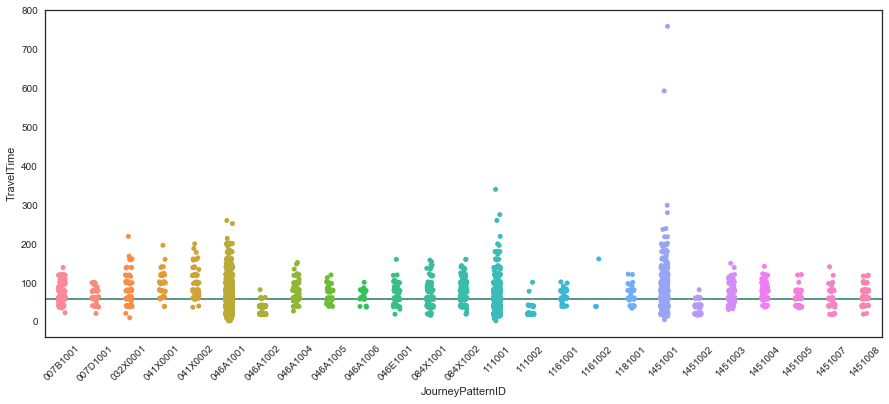

time: 610 ms


In [27]:
leeson.JourneyPatternID.cat.remove_unused_categories(inplace=True)
fig, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=45)
sns.stripplot(x='JourneyPatternID', y="TravelTime", data=leeson, jitter=True);

coord_x1 = -1
coord_y1 = leeson_mean
coord_z1 = leeson_median

coord_x2 = 30

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')
plt.plot([coord_x1, coord_x2], [coord_z1, coord_z1], '--')

Observation:  

### Bar plot for mean TravelTime per JourneyPatternID

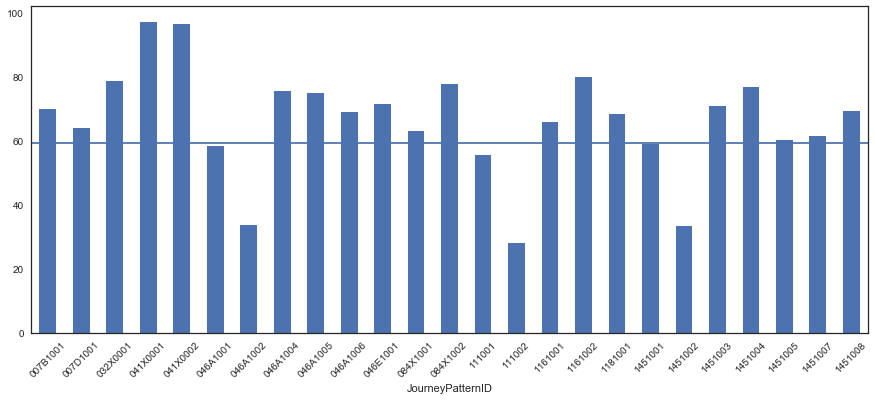

time: 253 ms


In [28]:
mean_JPID = leeson.groupby('JourneyPatternID')['TravelTime'].mean()
mean_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

# code for line from https://stackoverflow.com/questions/38017465/how-to-add-a-line-on-top-of-a-bar-chart

coord_x1 = -1
coord_y1 = leeson_mean

coord_x2 = 30

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Well over mean times for the majority of buses with 'X' in the number - Express buses, which skip a lot of stops; this doesn't seem to be one of them.  Busier routes also a bit over.  Very low scores for some '002' routes - these would be sprobably shorter than others and so fewer people would get on and off.Observation:  

### Bar plot for median TravelTime per JourneyPatternID

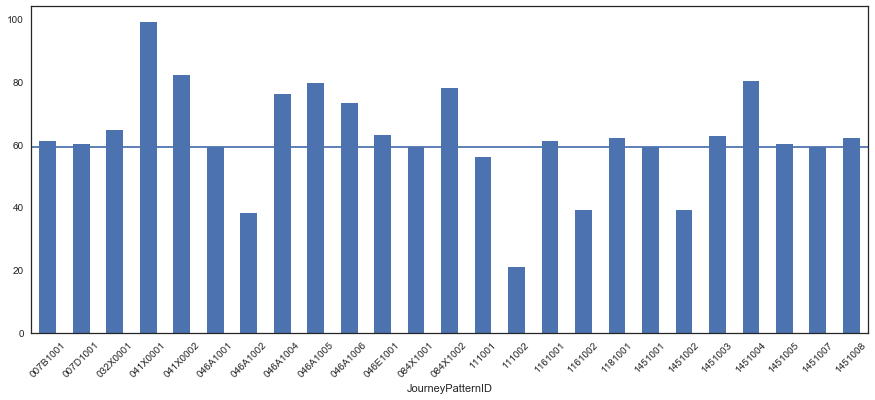

time: 217 ms


In [29]:
median_JPID = leeson.groupby('JourneyPatternID')['TravelTime'].median()
median_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

coord_x1 = -1
coord_y1 = leeson_median

coord_x2 = 30

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for mean TravelTime per HourFrame

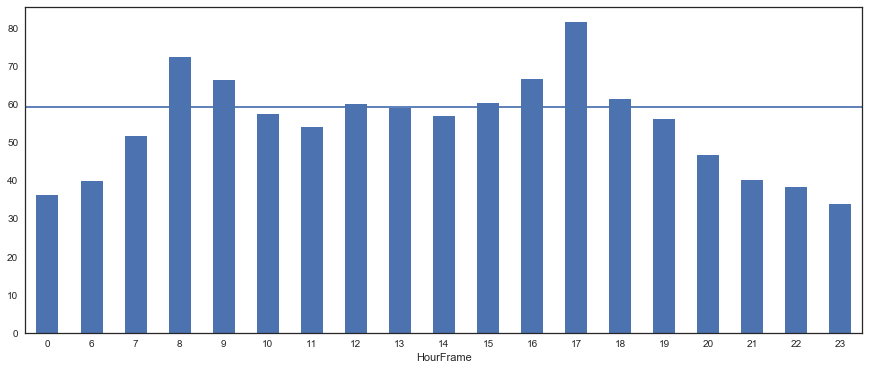

time: 188 ms


In [30]:
mean_HF = leeson.groupby('HourFrame')['TravelTime'].mean()
mean_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_mean
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Busy at rush-hour, especially the evening.

### Bar plot for median TravelTime per HourFrame

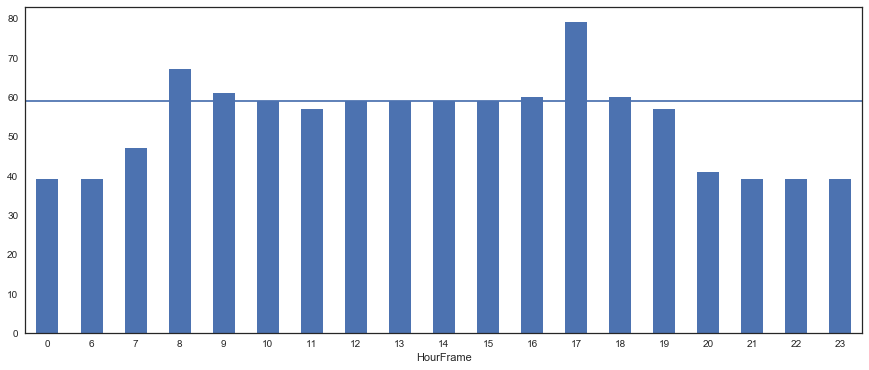

time: 201 ms


In [31]:
med_HF = leeson.groupby('HourFrame')['TravelTime'].median()
med_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_median
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  At or above median most of the day, drops off after 7pm and up until 7am.

### Bar plot for mean TravelTime per Day

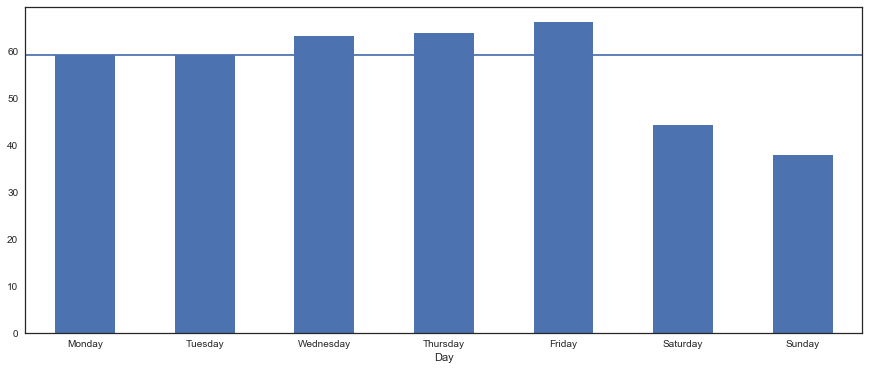

time: 150 ms


In [32]:
mean_Day = leeson.groupby('Day')['TravelTime'].mean()
mean_Day=mean_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

mean_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_mean

coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per HourFrame

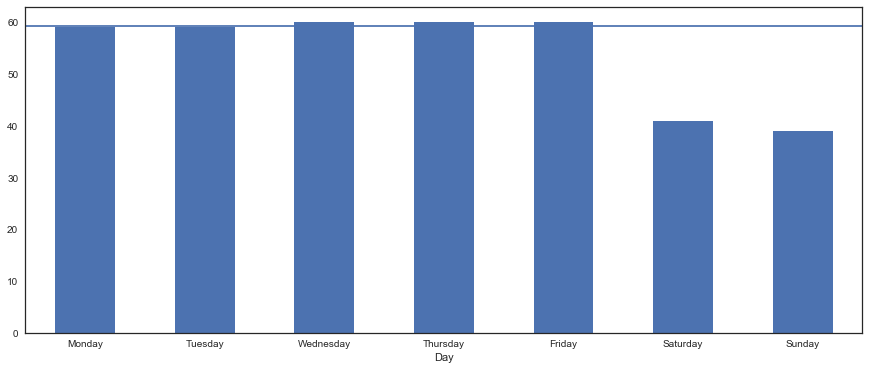

time: 153 ms


In [33]:
med_Day = leeson.groupby('Day')['TravelTime'].median()

med_Day=med_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
med_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Weekdays at median or above, slight increase as the week goes on.  A good third or so quieter on weekends, more pronounced on Sunday.

In [34]:
med_Day

Day
Monday       59
Tuesday      59
Wednesday    60
Thursday     60
Friday       60
Saturday     41
Sunday       39
Name: TravelTime, dtype: int64

time: 3 ms


### Bar plot for mean TravelTime when SchoolHoliday true/false

In [35]:
# check how many rows are true/false for SchoolHoliday
leeson.SchoolHoliday.describe().T

count     12986
unique        2
top       False
freq      10127
Name: SchoolHoliday, dtype: object

time: 6 ms


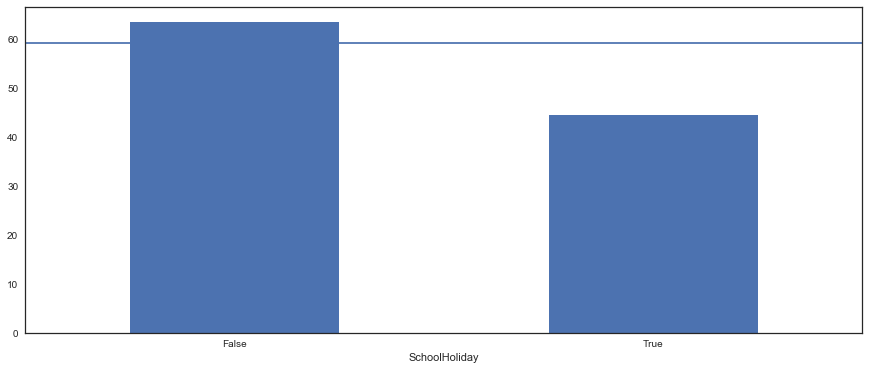

time: 175 ms


In [36]:
mean_SH = leeson.groupby('SchoolHoliday')['TravelTime'].mean()
mean_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime when SchoolHoliday true/false

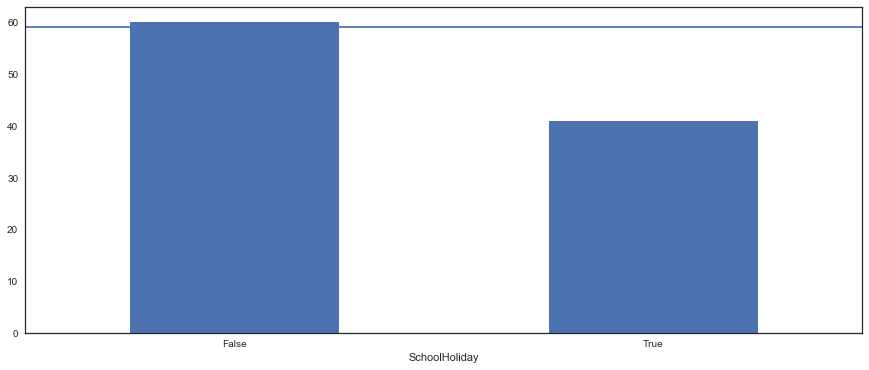

time: 131 ms


In [37]:
med_SH = leeson.groupby('SchoolHoliday')['TravelTime'].median()
med_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = leeson_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  As expected, given the above.

## Looking at dropping outliers

In [38]:
# make a copy of original df
trimleeson = leeson.copy()

# Remove TravelTime outliers beyond a conservative 3 x IQR
# Code adapted from here: http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/07%20-%20Lesson.ipynb
# Also got some help here: https://www.reddit.com/r/learnpython/comments/65sz8g/trying_to_get_highlight_outliers_in_a_dataframe/
# Functions first defined for calculating upper and lower bounds.
lowerOp = trimleeson.quantile(q=.25) - (3*(trimleeson.quantile(q=.75)-trimleeson.quantile(q=.25)))
upperOp = trimleeson.quantile(q=.75) + (3*(trimleeson.quantile(q=.75)-trimleeson.quantile(q=.25)))

# New boolean column created where values beyond the bounds for 'TravelTime' are tagged as True.
trimleeson['OutlierTT'] = (trimleeson['TravelTime'] < lowerOp['TravelTime']) | (trimleeson['TravelTime'] > upperOp['TravelTime'])

# Outlier rows counted
print("There have been", trimleeson[(trimleeson['OutlierTT'] == True)].shape[0], "outliers dropped.")

There have been 37 outliers dropped.
time: 23 ms


In [39]:
trimleeson = trimleeson[trimleeson.OutlierTT != True]
trimleeson.sort_values(['TravelTime'], ascending=False, inplace=True)

time: 58 ms


In [40]:
trimleeson

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID,OutlierTT
5823,188,17,Friday,False,0.666667,18.0,2013-01-18,041X0002,6288,09090786,False
6382,183,17,Monday,False,0.000000,14.5,2012-11-12,1451001,6725,09090786,False
4273,183,9,Friday,False,1.866211,21.5,2013-01-18,046A1001,6694,09090786,False
4298,181,11,Friday,False,0.600098,21.5,2013-01-18,046A1001,6749,09090786,False
11961,181,16,Friday,False,1.533203,18.5,2013-01-18,111001,4529,09090786,False
892,181,18,Wednesday,False,0.000000,6.0,2012-11-14,046A1001,7371,09090786,False
5975,181,12,Tuesday,False,0.000000,17.5,2012-11-06,1451001,6775,09090786,False
6184,180,17,Friday,False,0.000000,11.5,2012-11-09,1451001,6656,09090786,False
450,180,16,Friday,False,0.000000,12.0,2012-11-09,046A1001,7445,09090786,False
10718,180,17,Monday,False,0.000000,14.5,2012-11-12,111001,5308,09090786,False


time: 42 ms


Observation:  High value outliers have been cut, but some of these could be valid, given the delays that can happen in central Dublin at busy times.  Still, several are far outside the norm for the day and time, so we'll need to trim at some stage.  None of the low value outliers have been cut.  Another approach needs to be taken maybe.

### Linear Regression model

In [41]:
# Train/fit a model using all features to start with.
# Some modifications to the data first

# dropping SSID and TimeFrame as these have no predictive value here
LRLeeson = leeson.drop(['SSID', 'TimeFrame'], axis=1)

# Convert binary categorical SchoolHoliday column to numerical.
LRLeeson['SchoolHoliday'] = LRLeeson['SchoolHoliday'].astype('int')

time: 5 ms


In [42]:
# preliminary training to see which variables are worth selecting
lrle = sm.ols(formula="TravelTime ~  SchoolHoliday + WindSpeed + Rain + C(HourFrame) + C(JourneyPatternID) + C(Day)", data=LRLeeson).fit()

time: 102 ms


In [43]:
print(lrle.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     90.18
Date:                Sun, 30 Jul 2017   Prob (F-statistic):               0.00
Time:                        20:28:47   Log-Likelihood:                -59565.
No. Observations:               12986   AIC:                         1.192e+05
Df Residuals:                   12934   BIC:                         1.196e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Observation:  All weather and day features have strong p-values.  Most hours do too, though they drop off in the early morning and late evening; shall leave these in for now though.  Most JPIDs of low value - exceptions are 41Xs, 7D, 11s, some 145s and possibly 84X.  Note that 32X and a 84X have negative co-efficients - shall leave all Xs in for now as may want to make a feature of them.

In [44]:
rsqa = stm.regression.linear_model.RegressionResults.rsquared_adj(lrle) 

print ("Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.")
print ("The R-squared value of", rsqa, "means that Linear Regression is unlikely to be useful in the long run though.")
#ols(y=rets['AAPL'], x=rets.ix[:, ['GOOG']]).rsquared

Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.
The R-squared value of 0.259401875101 means that Linear Regression is unlikely to be useful in the long run though.
time: 2 ms


In [45]:
# Train/fit a model using features with p-value under 0.05

# create dummy variables from HourFrame, Day, JourneyPatternID using get_dummies
# code adapted from: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
HF_dummies = pd.get_dummies(LRLeeson.HourFrame, prefix='HF')
Day_dummies = pd.get_dummies(LRLeeson.Day, prefix='Day')
JPID_dummies = pd.get_dummies(LRLeeson.JourneyPatternID, prefix='JPID')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
LRLeeson = pd.concat([LRLeeson, HF_dummies, Day_dummies, JPID_dummies], axis=1)

time: 8 ms


In [46]:
print(LRLeeson.columns.values.tolist())

['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'JourneyPatternID', 'VehicleJourneyID', 'HF_0', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'JPID_007B1001', 'JPID_007D1001', 'JPID_032X0001', 'JPID_041X0001', 'JPID_041X0002', 'JPID_046A1001', 'JPID_046A1002', 'JPID_046A1004', 'JPID_046A1005', 'JPID_046A1006', 'JPID_046E1001', 'JPID_084X1001', 'JPID_084X1002', 'JPID_111001', 'JPID_111002', 'JPID_1161001', 'JPID_1161002', 'JPID_1181001', 'JPID_1451001', 'JPID_1451002', 'JPID_1451003', 'JPID_1451004', 'JPID_1451005', 'JPID_1451007', 'JPID_1451008']
time: 2 ms


In [47]:
# remove any features with p-values under 0.05 
# (for now excepting hours and a few JPID features with much lower than average mean TravelTime values)
# 'HF_7', 'HF_10', 'HF_20', 'HF_21', 'HF_22', 

LRLeeson = LRLeeson.drop(['JPID_1181001', 'JPID_1451003', 'JPID_1451004', 'JPID_1451005', 'JPID_1451007'], axis = 1)
LRLeeson = LRLeeson.drop(['JPID_1451008', 'JPID_1161002', 'JPID_1161001'], axis = 1)
LRLeeson = LRLeeson.drop(['JPID_046A1005', 'JPID_046A1006', 'JPID_046E1001'], axis = 1)

time: 10 ms


In [48]:
LRLeeson.shape

(12986, 48)

time: 2 ms


In [49]:
print(LRLeeson.columns.values.tolist())

['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'JourneyPatternID', 'VehicleJourneyID', 'HF_0', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'JPID_007B1001', 'JPID_007D1001', 'JPID_032X0001', 'JPID_041X0001', 'JPID_041X0002', 'JPID_046A1001', 'JPID_046A1002', 'JPID_046A1004', 'JPID_084X1001', 'JPID_084X1002', 'JPID_111001', 'JPID_111002', 'JPID_1451001', 'JPID_1451002']
time: 3 ms


In [50]:
LRLeeson.head(25)

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,JourneyPatternID,VehicleJourneyID,HF_0,HF_6,...,JPID_041X0002,JPID_046A1001,JPID_046A1002,JPID_046A1004,JPID_084X1001,JPID_084X1002,JPID_111001,JPID_111002,JPID_1451001,JPID_1451002
8980,759,17,Friday,0,0.666504,18.0,1451001,6378,0,0,...,0,0,0,0,0,0,0,0,1,0
7057,593,13,Wednesday,0,0.000000,11.5,1451001,6036,0,0,...,0,0,0,0,0,0,0,0,1,0
12087,340,7,Tuesday,0,0.000000,3.5,111001,4506,0,0,...,0,0,0,0,0,0,1,0,0,0
7585,299,20,Wednesday,0,0.000000,6.5,1451001,6160,0,0,...,0,0,0,0,0,0,0,0,1,0
6577,280,18,Wednesday,0,0.000000,6.0,1451001,6792,0,0,...,0,0,0,0,0,0,0,0,1,0
11339,275,19,Thursday,0,0.000000,4.0,111001,4664,0,0,...,0,0,0,0,0,0,1,0,0,0
840,260,18,Wednesday,0,0.000000,6.0,046A1001,7263,0,0,...,0,1,0,0,0,0,0,0,0,0
10769,260,18,Wednesday,0,0.000000,6.0,111001,5250,0,0,...,0,0,0,0,0,0,1,0,0,0
2513,252,19,Friday,0,0.000000,2.5,046A1001,6432,0,0,...,0,1,0,0,0,0,0,0,0,0
8978,239,16,Friday,0,1.533203,18.5,1451001,6363,0,0,...,0,0,0,0,0,0,0,0,1,0


time: 32 ms


In [51]:
lrle1 = sm.ols(formula="TravelTime ~  SchoolHoliday + WindSpeed + Rain + HF_0 + HF_6 + HF_7 + HF_8 + HF_9 + HF_10 + HF_11 + HF_12 + HF_13 + HF_14 + HF_15 + HF_16 + HF_17 + HF_18 + HF_19 + HF_20 + HF_21 + HF_22 + HF_23 + Day_Friday + Day_Monday + Day_Saturday + Day_Sunday + Day_Thursday + Day_Tuesday + Day_Wednesday + JPID_111001 + JPID_111002 + JPID_007D1001 + JPID_1451001 + JPID_1451002 + JPID_032X0001 + JPID_041X0001 + JPID_041X0002 + JPID_046A1001 + JPID_046A1002 + JPID_084X1001 + JPID_084X1002", data=LRLeeson).fit()

time: 86 ms


In [52]:
print(lrle1.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     117.4
Date:                Sun, 30 Jul 2017   Prob (F-statistic):               0.00
Time:                        20:28:48   Log-Likelihood:                -59573.
No. Observations:               12986   AIC:                         1.192e+05
Df Residuals:                   12946   BIC:                         1.195e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        46.5048      0.927     50.159

Observation:  Only the 41Xs and an 84X of the JPIDs have very significant p-values.  Going to try out a Boolean feature for whether a JPID has X in its name.

In [53]:
# new feature: does the bus have an X in its name?

LRLeeson['XBuses'] = LRLeeson[LRLeeson["JourneyPatternID"].str.find("X") > 0].sum(axis=1) > 0
LRLeeson["XBuses"].fillna(False, inplace=True)
LRLeeson['XBuses'] = LRLeeson['XBuses'].astype('int')

LRLeeson["XBuses"]
LRLeeson

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,JourneyPatternID,VehicleJourneyID,HF_0,HF_6,...,JPID_046A1001,JPID_046A1002,JPID_046A1004,JPID_084X1001,JPID_084X1002,JPID_111001,JPID_111002,JPID_1451001,JPID_1451002,XBuses
8980,759,17,Friday,0,0.666504,18.0,1451001,6378,0,0,...,0,0,0,0,0,0,0,1,0,0
7057,593,13,Wednesday,0,0.000000,11.5,1451001,6036,0,0,...,0,0,0,0,0,0,0,1,0,0
12087,340,7,Tuesday,0,0.000000,3.5,111001,4506,0,0,...,0,0,0,0,0,1,0,0,0,0
7585,299,20,Wednesday,0,0.000000,6.5,1451001,6160,0,0,...,0,0,0,0,0,0,0,1,0,0
6577,280,18,Wednesday,0,0.000000,6.0,1451001,6792,0,0,...,0,0,0,0,0,0,0,1,0,0
11339,275,19,Thursday,0,0.000000,4.0,111001,4664,0,0,...,0,0,0,0,0,1,0,0,0,0
840,260,18,Wednesday,0,0.000000,6.0,046A1001,7263,0,0,...,1,0,0,0,0,0,0,0,0,0
10769,260,18,Wednesday,0,0.000000,6.0,111001,5250,0,0,...,0,0,0,0,0,1,0,0,0,0
2513,252,19,Friday,0,0.000000,2.5,046A1001,6432,0,0,...,1,0,0,0,0,0,0,0,0,0
8978,239,16,Friday,0,1.533203,18.5,1451001,6363,0,0,...,0,0,0,0,0,0,0,1,0,0


time: 68 ms


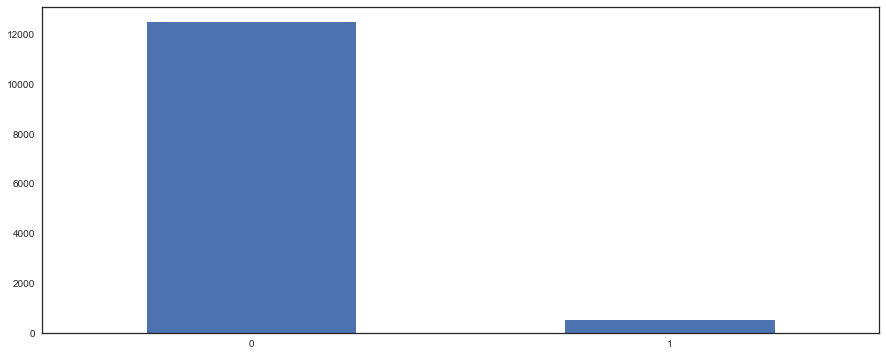

time: 135 ms


In [54]:
LRLeeson['XBuses'].value_counts().plot(kind='bar', figsize=(15, 6), rot=0)

Observation: not very many X-buses

In [55]:
lrle2 = sm.ols(formula="TravelTime ~  SchoolHoliday + WindSpeed + Rain + HF_0 + HF_6 + HF_7 + HF_8 + HF_9 + HF_10 + HF_11 + HF_12 + HF_13 + HF_14 + HF_15 + HF_16 + HF_17 + HF_18 + HF_19 + HF_20 + HF_21 + HF_22 + HF_23 + Day_Friday + Day_Monday + Day_Saturday + Day_Sunday + Day_Thursday + Day_Tuesday + Day_Wednesday + XBuses + JPID_032X0001 + JPID_041X0001 + JPID_041X0002 + JPID_084X1001 + JPID_084X1002", data=LRLeeson).fit()

time: 144 ms


In [56]:
print(lrle2.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     142.3
Date:                Sun, 30 Jul 2017   Prob (F-statistic):               0.00
Time:                        20:28:48   Log-Likelihood:                -59584.
No. Observations:               12986   AIC:                         1.192e+05
Df Residuals:                   12953   BIC:                         1.195e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        46.2521      0.489     94.593

Observation:  p-value of XBuses is significant anyway.  Trying without any JPIDs.

In [57]:
lrle3 = sm.ols(formula="TravelTime ~  SchoolHoliday + WindSpeed + Rain + HF_0 + HF_6 + HF_7 + HF_8 + HF_9 + HF_10 + HF_11 + HF_12 + HF_13 + HF_14 + HF_15 + HF_16 + HF_17 + HF_18 + HF_19 + HF_20 + HF_21 + HF_22 + HF_23 + Day_Friday + Day_Monday + Day_Saturday + Day_Sunday + Day_Thursday + Day_Tuesday + Day_Wednesday + XBuses", data=LRLeeson).fit()

time: 53 ms


In [58]:
print(lrle3.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     161.8
Date:                Sun, 30 Jul 2017   Prob (F-statistic):               0.00
Time:                        20:28:48   Log-Likelihood:                -59593.
No. Observations:               12986   AIC:                         1.192e+05
Df Residuals:                   12957   BIC:                         1.195e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        46.2528      0.489     94.550

Observation:  Including this feature and dropping all JPIDs has seen the Adj. R-squared score drop just 0.002 points.  Then again, XBuses alone only raises it by 0.001 point.

In [59]:
# new feature: for each route, how many times did it traverse this segment in total?

LRLeeson['JPID_Total_Journeys'] = LRLeeson['JourneyPatternID'].value_counts()

#LRLeeson['JPID_Total_Journeys'].plot(kind='bar', title='JourneyPatternID by number of unique journeys', figsize=(15, 15))

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\pandas\core\indexes\category.py:138: RuntimeWarning: Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  data = Categorical(data, categories=categories, ordered=ordered)
C:\CS\Anaconda\envs\DublinBus\lib\site-packages\pandas\core\indexes\category.py:138: RuntimeWarning: None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  data = Categorical(data, categories=categories, ordered=ordered)


time: 6min 45s


In [60]:
LRLeeson['JPID_Total_Journeys']

8980    NaN
7057    NaN
12087   NaN
7585    NaN
6577    NaN
11339   NaN
840     NaN
10769   NaN
2513    NaN
8978    NaN
7608    NaN
12031   NaN
10394   NaN
9472    NaN
6680    NaN
3359    NaN
4245    NaN
4253    NaN
2527    NaN
4589    NaN
3346    NaN
2406    NaN
6095    NaN
4248    NaN
5790    NaN
6548    NaN
10786   NaN
8971    NaN
1826    NaN
1312    NaN
         ..
942     NaN
6662    NaN
678     NaN
10722   NaN
352     NaN
11905   NaN
11819   NaN
3087    NaN
3053    NaN
2937    NaN
11530   NaN
11370   NaN
6807    NaN
12113   NaN
3498    NaN
5109    NaN
3089    NaN
3169    NaN
10425   NaN
2516    NaN
5169    NaN
12109   NaN
2484    NaN
4292    NaN
7736    NaN
4065    NaN
2485    NaN
4722    NaN
11359   NaN
2150    NaN
Name: JPID_Total_Journeys, Length: 12986, dtype: float64

time: 4 ms


In [61]:
LRLeeson['JourneyPatternID'].dtype

category

time: 3 ms


In [62]:
# new feature: how many stops does each route traverse?



time: 2 ms


In [63]:
lrle1 = sm.ols(formula="TravelTime ~  SchoolHoliday + WindSpeed + Rain + XBuses + HF_0 + HF_6 + HF_7 + HF_8 + HF_9 + HF_10 + HF_11 + HF_12 + HF_13 + HF_14 + HF_15 + HF_16 + HF_17 + HF_18 + HF_19 + HF_20 + HF_21 + HF_22 + HF_23 + Day_Friday + Day_Monday + Day_Saturday + Day_Sunday + Day_Thursday + Day_Tuesday + Day_Wednesday + JPID_041X0001 + JPID_041X0002 + JPID_084X1002", data=LRLeeson).fit()

time: 53 ms


In [64]:
print(lrle1.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 30 Jul 2017   Prob (F-statistic):               0.00
Time:                        20:35:33   Log-Likelihood:                -59584.
No. Observations:               12986   AIC:                         1.192e+05
Df Residuals:                   12954   BIC:                         1.195e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        46.2525      0.489     94.597